In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import lightgbm as LGBMRegressor
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from plotly.subplots import make_subplots
import plotly.graph_objects as graph_objects
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier as kNN
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import lightgbm as lgm
from lightgbm import LGBMRegressor

In [ ]:
filePath = "/content/drive/MyDrive/BitcoinDataset/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv"

In [ ]:
df = pd.read_csv(filePath)
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
tempdf = pd.read_csv(filePath)
tempdf

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
df = df.drop('Date', axis = 1)

In [ ]:
count = 0
for i in range(len(df) - 1, -1, -1):
    if(df['Volume'][i] == '-'):
        count += 1
    

count  #Hence all the null values in Volume occur in the last 243 rows. The rows are therefore dropped.

243

In [ ]:
df.drop(range(1313, 1556), inplace = True)
df

,Open,High,Low,Close,Volume,Market Cap
0,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...
1308,760.32,760.58,738.17,754.01,"20,897,300","9,268,240,000"
1309,741.35,766.60,740.24,756.13,"20,707,700","9,037,000,000"
1310,728.05,748.61,714.44,745.05,"19,011,300","8,872,600,000"
1311,737.98,747.06,705.35,727.83,"32,505,800","8,990,850,000"


In [ ]:
df.Volume.value_counts()

860,575,000    1
40,465,700     1
41,383,000     1
41,302,400     1
28,918,900     1
              ..
81,987,900     1
42,762,300     1
39,657,600     1
50,582,500     1
46,862,700     1
Name: Volume, Length: 1313, dtype: int64

In [ ]:
df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [ ]:
for i in range(len(df)):
    df['Market Cap'][i] = df['Market Cap'][i].replace(',', '')
    df['Volume'][i] = df['Volume'][i].replace(',', '')

df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [ ]:
df = df.astype({'Market Cap' : int, 'Volume': int}, copy = False)
df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market Cap      int64
dtype: object

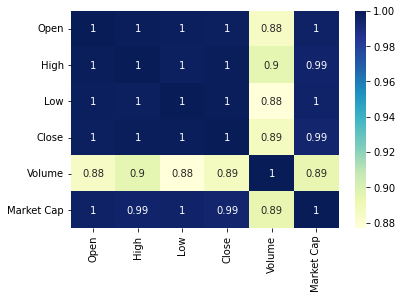

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

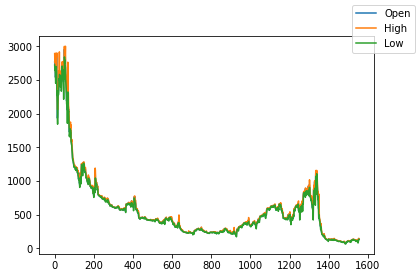

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(tempdf.Open, label = 'Open')
ax.plot(tempdf.High, label = 'High')
ax.plot(tempdf.Low, label = 'Low')
fig.legend()

In [ ]:
df = df.drop(['Open', 'High', 'Low'], axis = 1)
df

,Close,Volume,Market Cap
0,2875.34,860575000,45535800000
1,2757.18,705943000,44890700000
2,2726.45,803746000,46246700000
3,2809.01,1380100000,44144400000
4,2671.78,789104000,41816500000
...,...,...,...
1308,754.01,20897300,9268240000
1309,756.13,20707700,9037000000
1310,745.05,19011300,8872600000
1311,727.83,32505800,8990850000


In [ ]:
x = df.drop('Market Cap', axis = 1)
y = df['Market Cap']

x_train = x.loc[:1049]
y_train = y.loc[:1049]
x_test = x.loc[1050:]
y_test = y.loc[1050:]

In [ ]:
x_train

,Close,Volume
0,2875.34,860575000
1,2757.18,705943000
2,2726.45,803746000
3,2809.01,1380100000
4,2671.78,789104000
...,...,...
1045,408.90,36863600
1046,394.80,37919700
1047,424.44,34483200
1048,457.33,21056800


In [ ]:
x_test

,Close,Volume
1050,475.37,15345200
1051,477.89,13105500
1052,479.00,15588000
1053,477.75,15437200
1054,479.75,16852900
...,...,...
1308,754.01,20897300
1309,756.13,20707700
1310,745.05,19011300
1311,727.83,32505800


##LGBM Regressor

In [ ]:
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(x, y)

modelTemp = LGBMRegressor()
modelTemp.fit(x_train_random, y_train_random)
print(r2_score(y_test_random, modelTemp.predict(x_test_random)))

0.9925526315728358


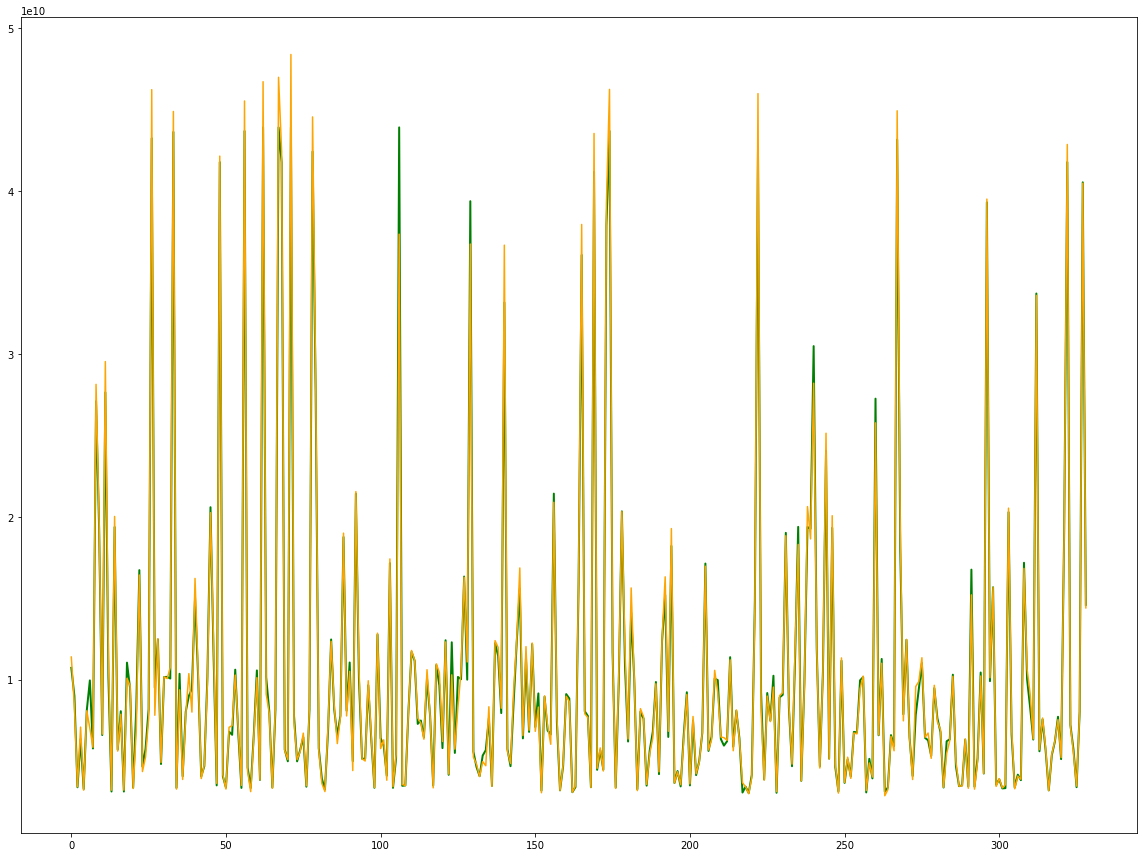

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 15))
ax = plt.plot(modelTemp.predict(x_test_random), color = 'green', linewidth = 2)
ax = plt.plot(y_test_random.values, color = 'orange')

In [ ]:
def Makedf(df, n = 32):
    values = []
    for i in range(n, len(df)):
        temp = []
        for j in range(i - 1, i - n - 1, -1):
            temp.append(df[j])
        values.append(temp)

    return pd.DataFrame(values)

closedf = Makedf(df.Close)
volumedf = Makedf(df.Volume)
marketdf = Makedf(df['Market Cap'])


In [ ]:
closedf

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,2518.44,...,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18,2875.34
1,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,...,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18
2,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,...,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45
3,2552.45,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,...,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01
4,2478.45,2552.45,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,...,2318.88,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,771.40,802.39,818.72,859.51,933.53,953.29,802.00,842.72,846.86,868.48,...,822.04,797.07,853.61,885.28,771.39,812.51,826.00,819.03,829.92,832.58
1277,754.01,771.40,802.39,818.72,859.51,933.53,953.29,802.00,842.72,846.86,...,845.59,822.04,797.07,853.61,885.28,771.39,812.51,826.00,819.03,829.92
1278,756.13,754.01,771.40,802.39,818.72,859.51,933.53,953.29,802.00,842.72,...,863.91,845.59,822.04,797.07,853.61,885.28,771.39,812.51,826.00,819.03
1279,745.05,756.13,754.01,771.40,802.39,818.72,859.51,933.53,953.29,802.00,...,870.20,863.91,845.59,822.04,797.07,853.61,885.28,771.39,812.51,826.00


In [ ]:
close_xtrain = closedf.loc[:1049]
close_xtest = closedf.loc[1050:]
close_ytrain = df.Close.loc[32:1081]
close_ytest = df.Close.loc[1082:]

In [ ]:
model = LGBMRegressor()
model.fit(close_xtrain, close_ytrain)
pred_close = model.predict(close_xtest)

In [ ]:
close_ytest.values[0]

505.97

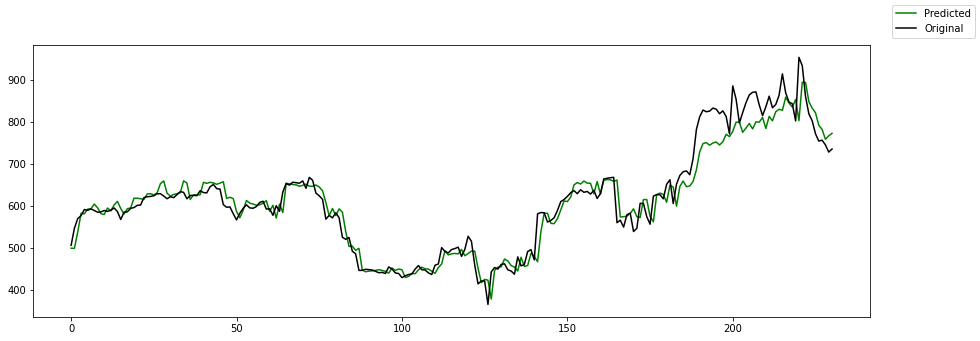

In [ ]:
fig, ax = plt.subplots(1, figsize = (15, 5))
x = range(len(pred_close))
ax = plt.plot(x, pred_close, color = 'green', label = 'Predicted')
ax = plt.plot(x, close_ytest, color = 'black', label = 'Original')
fig.legend()

In [ ]:
print(r2_score(close_ytest, pred_close))

0.9270570767226136


In [ ]:
predictions = []
closeValues = []

closeValues.append(close_xtest.values[0])
predictions.append(model.predict(closeValues))

for i in range(1, len(close_xtest)):
    temp = list(predictions[i-1]) + list(closeValues[i-1][:-1])
    predictions.append(model.predict([temp]))
    closeValues.append(temp)

pd.DataFrame(closeValues)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,514.040000,498.070000,508.290000,...,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000,479.000000,477.890000,475.370000
1,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,514.040000,498.070000,...,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000,479.000000,477.890000
2,491.531374,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,514.040000,...,489.660000,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000,479.000000
3,500.969222,491.531374,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,...,477.590000,489.660000,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000
4,508.571424,500.969222,491.531374,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,...,477.430000,477.590000,489.660000,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511
227,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511
228,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511
229,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511


In [ ]:
predictions

[array([499.02929226]),
 array([491.53137365]),
 array([500.96922183]),
 array([508.57142355]),
 array([507.85923851]),
 array([504.86423258]),
 array([504.86423258]),
 array([504.38951711]),
 array([509.26062163]),
 array([504.46719068]),
 array([497.13431983]),
 array([497.85640654]),
 array([496.43244441]),
 array([500.58916163]),
 array([505.55841856]),
 array([505.17251144]),
 array([505.17251144]),
 array([503.22560357]),
 array([505.17251144]),
 array([505.64722691]),
 array([505.17251144]),
 array([504.38951711]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([504.48496671]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.1725

In [ ]:
volume_xtrain = volumedf.loc[:1049]
volume_xtest = volumedf.loc[1050:]
volume_ytrain = df.Volume.loc[32:1081]
volume_ytest = df.Volume.loc[1082:]

In [ ]:
volume_xtrain = volumedf.loc[:1049]
volume_xtest = volumedf.loc[1050:]
volume_ytrain = df.Volume.loc[32:1081]
volume_ytest = df.Volume.loc[1082:]

In [ ]:
model = LGBMRegressor()
model.fit(volume_xtrain, volume_ytrain)
pred_volume = model.predict(volume_xtest)

In [ ]:
volume_ytest.values[0]

35803900

In [ ]:
print(r2_score(volume_ytest, pred_volume))

0.20322635078079399


In [ ]:
market_xtrain = marketdf.loc[:1049]
market_xtest = marketdf.loc[1050:]
market_ytrain = df['Market Cap'].loc[32:1081]
market_ytest = df['Market Cap'].loc[1082:]

In [ ]:
model = LGBMRegressor()
model.fit(market_xtrain, market_ytrain)
pred_market = model.predict(market_xtest)

In [ ]:
market_ytest.values[0]

7175190000

In [ ]:
print(r2_score(market_ytest, pred_market))

0.8214298310458368


In [ ]:
predicted_features = np.array([pred_close, pred_volume]).T
finalPredict = modelTemp.predict(predicted_features)
print(r2_score(finalPredict, y_test.values[32:]))

0.7644131589687022


In [ ]:
def Denoise(l, n):
    ans = l
    for i in range(n//2, len(l) - n//2):
        sum = 0
        for j in range(i - n//2, i + n//2):
            sum += l[j]
        ans[i] = sum / n
    
    return ans

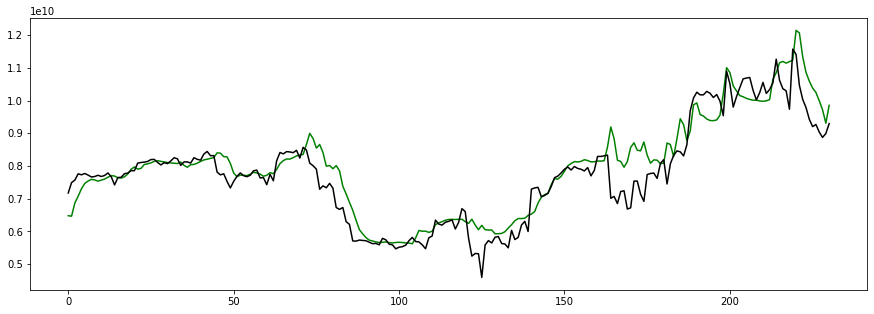

In [ ]:
fig, ax = plt.subplots(1, figsize = (15, 5))
ax = plt.plot(Denoise(finalPredict, 4), color = 'green', label = 'Predicted')
ax = plt.plot(y_test.values[32:], color = 'black', label = 'Original')
ax.legend()

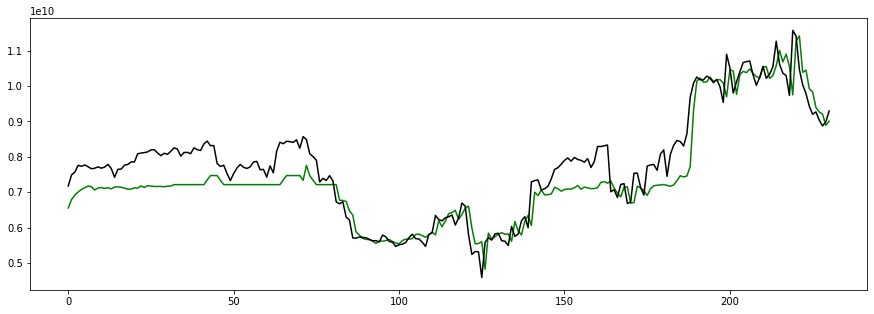

In [ ]:
fig, ax = plt.subplots(1, figsize = (15, 5))
ax = plt.plot(pred_market, color = 'green', label = 'Predicted')
ax = plt.plot(y_test.values[32:], color = 'black', label = 'Original')
ax.legend()


##Linear Regression

In [ ]:
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(x, y)

modelTemp = LinearRegression()
modelTemp.fit(x_train_random, y_train_random)
print(r2_score(y_test_random, modelTemp.predict(x_test_random)))

0.9925526315728358


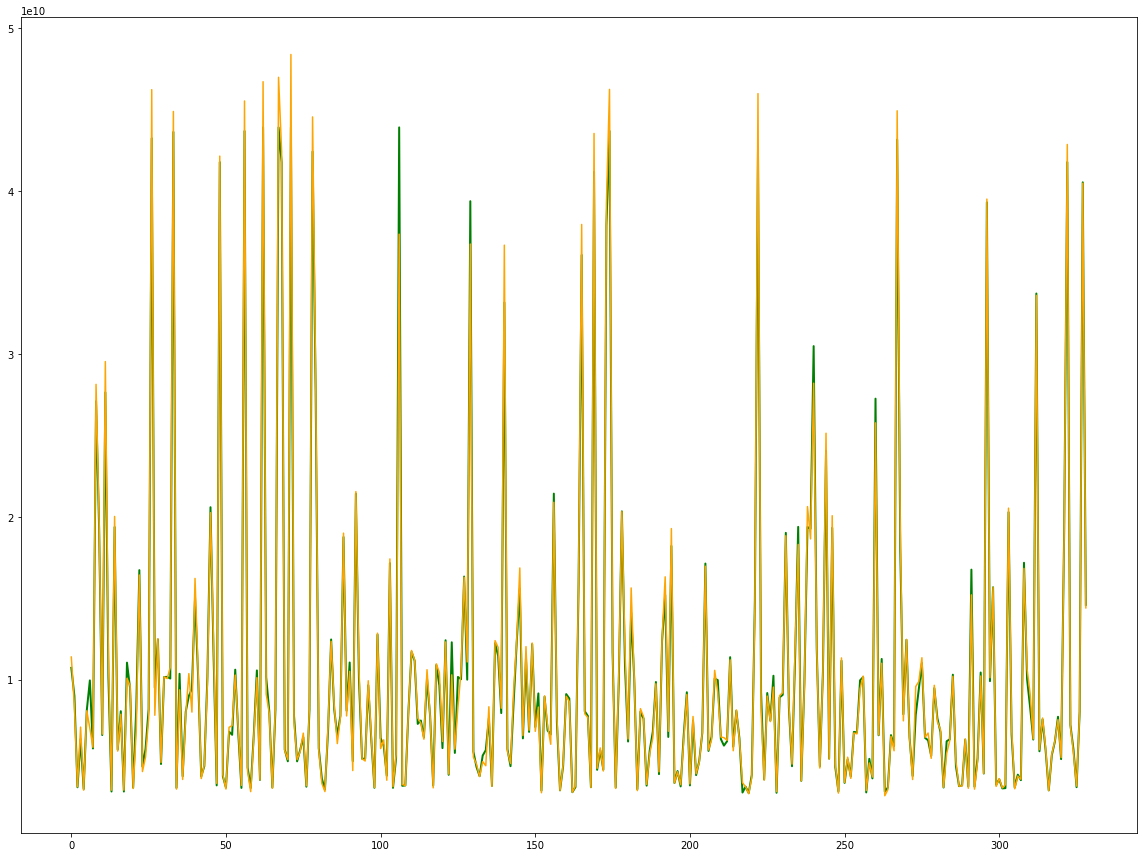

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 15))
ax = plt.plot(modelTemp.predict(x_test_random), color = 'green', linewidth = 2)
ax = plt.plot(y_test_random.values, color = 'orange')

In [ ]:
def Makedf(df, n = 32):
    values = []
    for i in range(n, len(df)):
        temp = []
        for j in range(i - 1, i - n - 1, -1):
            temp.append(df[j])
        values.append(temp)

    return pd.DataFrame(values)

closedf = Makedf(df.Close)
volumedf = Makedf(df.Volume)
marketdf = Makedf(df['Market Cap'])


In [ ]:
closedf

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,2518.44,...,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18,2875.34
1,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,...,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18
2,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,...,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45
3,2552.45,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,...,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01
4,2478.45,2552.45,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,...,2318.88,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,771.40,802.39,818.72,859.51,933.53,953.29,802.00,842.72,846.86,868.48,...,822.04,797.07,853.61,885.28,771.39,812.51,826.00,819.03,829.92,832.58
1277,754.01,771.40,802.39,818.72,859.51,933.53,953.29,802.00,842.72,846.86,...,845.59,822.04,797.07,853.61,885.28,771.39,812.51,826.00,819.03,829.92
1278,756.13,754.01,771.40,802.39,818.72,859.51,933.53,953.29,802.00,842.72,...,863.91,845.59,822.04,797.07,853.61,885.28,771.39,812.51,826.00,819.03
1279,745.05,756.13,754.01,771.40,802.39,818.72,859.51,933.53,953.29,802.00,...,870.20,863.91,845.59,822.04,797.07,853.61,885.28,771.39,812.51,826.00


In [ ]:
close_xtrain = closedf.loc[:1049]
close_xtest = closedf.loc[1050:]
close_ytrain = df.Close.loc[32:1081]
close_ytest = df.Close.loc[1082:]

In [ ]:
model = LinearRegression()
model.fit(close_xtrain, close_ytrain)
pred_close = model.predict(close_xtest)

In [ ]:
close_ytest.values[0]

505.97

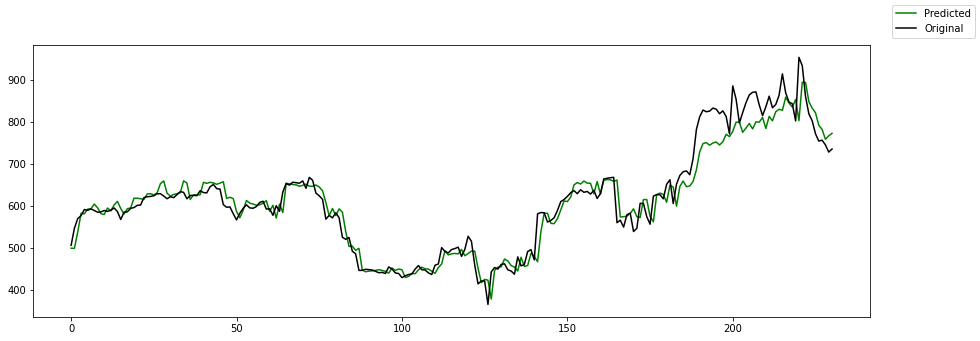

In [ ]:
fig, ax = plt.subplots(1, figsize = (15, 5))
x = range(len(pred_close))
ax = plt.plot(x, pred_close, color = 'green', label = 'Predicted')
ax = plt.plot(x, close_ytest, color = 'black', label = 'Original')
fig.legend()

In [ ]:
predictions = []
closeValues = []

closeValues.append(close_xtest.values[0])
predictions.append(model.predict(closeValues))

for i in range(1, len(close_xtest)):
    temp = list(predictions[i-1]) + list(closeValues[i-1][:-1])
    predictions.append(model.predict([temp]))
    closeValues.append(temp)

pd.DataFrame(closeValues)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,514.040000,498.070000,508.290000,...,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000,479.000000,477.890000,475.370000
1,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,514.040000,498.070000,...,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000,479.000000,477.890000
2,491.531374,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,514.040000,...,489.660000,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000,479.000000
3,500.969222,491.531374,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,517.240000,...,477.590000,489.660000,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000,477.750000
4,508.571424,500.969222,491.531374,499.029292,497.010000,519.710000,491.800000,461.460000,485.250000,511.980000,...,477.430000,477.590000,489.660000,483.340000,484.830000,482.280000,474.600000,475.260000,479.360000,479.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511
227,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511
228,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511
229,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,...,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511,505.172511


In [ ]:
predictions

[array([499.02929226]),
 array([491.53137365]),
 array([500.96922183]),
 array([508.57142355]),
 array([507.85923851]),
 array([504.86423258]),
 array([504.86423258]),
 array([504.38951711]),
 array([509.26062163]),
 array([504.46719068]),
 array([497.13431983]),
 array([497.85640654]),
 array([496.43244441]),
 array([500.58916163]),
 array([505.55841856]),
 array([505.17251144]),
 array([505.17251144]),
 array([503.22560357]),
 array([505.17251144]),
 array([505.64722691]),
 array([505.17251144]),
 array([504.38951711]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([504.48496671]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.17251144]),
 array([505.1725

In [ ]:
volume_xtrain = volumedf.loc[:1049]
volume_xtest = volumedf.loc[1050:]
volume_ytrain = df.Volume.loc[32:1081]
volume_ytest = df.Volume.loc[1082:]

In [ ]:
print(r2_score(close_ytest, pred_close))

0.9270570767226136


In [ ]:
volume_xtrain = volumedf.loc[:1049]
volume_xtest = volumedf.loc[1050:]
volume_ytrain = df.Volume.loc[32:1081]
volume_ytest = df.Volume.loc[1082:]

In [ ]:
model = LinearRegression()
model.fit(volume_xtrain, volume_ytrain)
pred_volume = model.predict(volume_xtest)

In [ ]:
volume_ytest.values[0]

35803900

In [ ]:
print(r2_score(volume_ytest, pred_volume))

0.20322635078079399


In [ ]:
market_xtrain = marketdf.loc[:1049]
market_xtest = marketdf.loc[1050:]
market_ytrain = df['Market Cap'].loc[32:1081]
market_ytest = df['Market Cap'].loc[1082:]

In [ ]:
model = LinearRegression()
model.fit(market_xtrain, market_ytrain)
pred_market = model.predict(market_xtest)

In [ ]:
market_ytest.values[0]

7175190000

In [ ]:
print(r2_score(market_ytest, pred_market))

0.8214298310458368


In [ ]:
predicted_features = np.array([pred_close, pred_volume]).T
finalPredict = modelTemp.predict(predicted_features)
print(r2_score(finalPredict, y_test.values[32:]))

0.7644131589687022


In [ ]:
def Denoise(l, n):
    ans = l
    for i in range(n//2, len(l) - n//2):
        sum = 0
        for j in range(i - n//2, i + n//2):
            sum += l[j]
        ans[i] = sum / n
    
    return ans

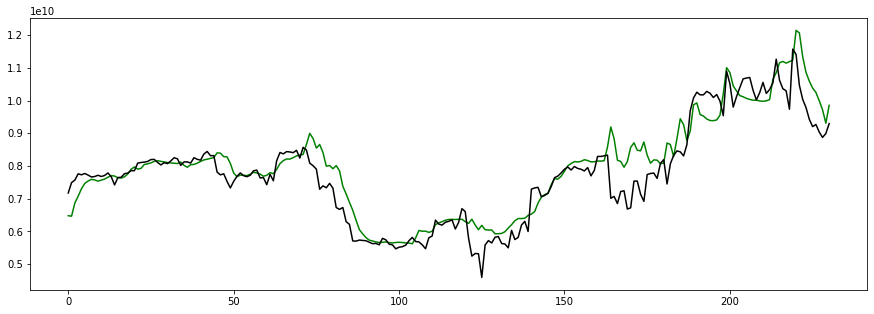

In [ ]:
fig, ax = plt.subplots(1, figsize = (15, 5))
ax = plt.plot(Denoise(finalPredict, 4), color = 'green', label = 'Predicted')
ax = plt.plot(y_test.values[32:], color = 'black', label = 'Original')
ax.legend()

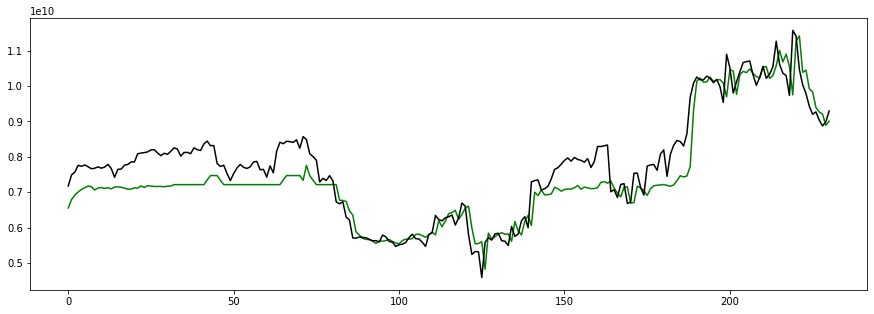

In [ ]:
fig, ax = plt.subplots(1, figsize = (15, 5))
ax = plt.plot(pred_market, color = 'green', label = 'Predicted')
ax = plt.plot(y_test.values[32:], color = 'black', label = 'Original')
ax.legend()
